<a href="https://colab.research.google.com/github/ckongara/aer850_project2/blob/main/AER850_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

#directory_to_remove = '/content/drive/MyDrive/Notes/Year4/Fall/AER850/AER850_Project_2_Data/.ipynb_checkpoints'

#try:
    #os.rmdir(directory_to_remove)
    #print(f"Directory '{directory_to_remove}' successfully removed.")
#except OSError as e:
    #print(f"Error: {directory_to_remove} - {e}")
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# Task 1: Define input image shape
input_shape = (100, 100, 3)  # Width: 100, Height: 100, Channels: 3

# Task 2: Define relative paths for data directories
train_data_dir = '/content/drive/MyDrive/Notes/Year4/Fall/AER850/AER850_Project_2_Data/Train'  # Path for training data
val_data_dir = '/content/drive/MyDrive/Notes/Year4/Fall/AER850/AER850_Project_2_Data/Validation'   # Path for validation data
test_data_dir = '/content/drive/MyDrive/Notes/Year4/Fall/AER850/AER850_Project_2_Data/Test'     # Path for testing data

# Task 3: Perform data augmentation for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for validation data

# Task 4: Create train and validation generators using ImageDataGenerator
batch_size = 32
class_mode = 'categorical'

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode=class_mode
)


validation_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode=class_mode
)

with tf.device(device_name):

  # Create a Sequential model
  model = Sequential()

  # Task 1: Add convolutional layers
  model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
  model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))

  # Task 3: Add max pooling layers
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # Task 4: Add flatten layer
  model.add(Flatten())

  # Task 5: Add fully connected dense layers and dropout
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.6))  # Adjust dropout rate as needed
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.6))  # Adjust dropout rate as needed
  model.add(Dense(4, activation='softmax'))  # Output layer with 4 neurons for 4 classes

  # Task 6-9: Compile the model with specified activations, loss, and optimizer
  model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['categorical_crossentropy','accuracy'])
  model.summary()

#Prepare data for plotting
history = model.fit(train_generator, validation_data=validation_generator, epochs=20)

Found 1600 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 47, 47, 64)        0         
 D)                                                              
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                       

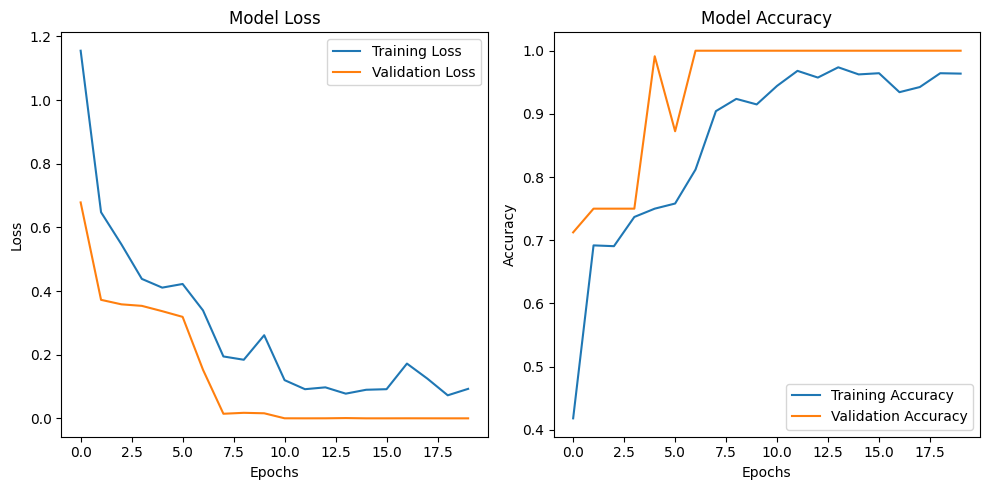

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Save model
from google.colab import drive
from tensorflow.keras.models import save_model

drive.mount('/content/drive')
model.save('/content/drive/MyDrive/Notes/Year4/Fall/AER850/AER850_Proj2_NN_Model.keras')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 [==============================] - 0s 20ms/step


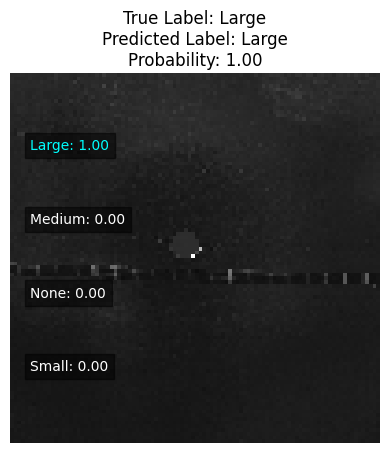

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

new_model=tf.keras.models.load_model('my_model.keras')

# Load an image for prediction
image_path = '/content/drive/MyDrive/Notes/Year4/Fall/AER850/AER850_Project_2_Data/Test/Large/Crack__20180419_13_29_14,846.bmp'
img = image.load_img(image_path, target_size=(100, 100))  # Resize to match model input size
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize image data

# Get model predictions
predictions = model.predict(img_array)

# Get the predicted class label
predicted_class = np.argmax(predictions)
predicted_prob = np.max(predictions)

# Create a dictionary of class names
class_names = {
    0: "Large",
    1: "Medium",
    2: "None",
    3: "Small"
}

# Change this variable depending on which test image is used (i.e. Large, Medium, None, Small)
true_label = "Large"

# Map predicted class index to label using class_names dictionary
predicted_label = class_names[predicted_class]  # Assuming class_names is available

# Prepare the output with true and predicted labels
output = f"True Label: {true_label}\nPredicted Label: {predicted_label}\nProbability: {predicted_prob:.2f}"

# Display the image with overlaid text
plt.imshow(img)
plt.title(output)
plt.axis('off')

# Show the probabilities overlaid on the image
for i, prob in enumerate(predictions[0]):
    label = class_names[i]
    text_color = 'cyan' if label == predicted_label else 'white'  # Color for predicted label
    plt.text(5, 20 + 20 * i, f"{label}: {prob:.2f}", color=text_color, fontsize=10, bbox=dict(facecolor='black', alpha=0.5))

plt.show()